ans =

   272     3



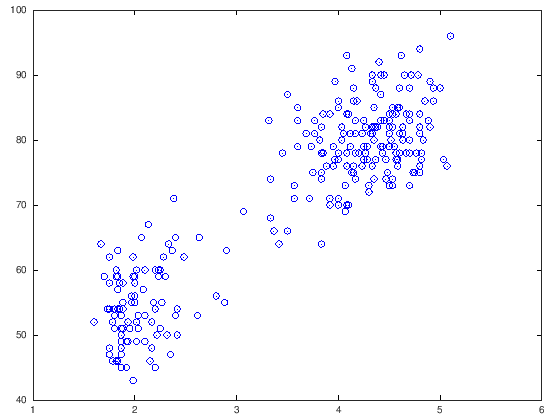

In [1]:
A = load('faithful.txt');
size(A)
X = A(:,2:3);
plot(X(:,1), X(:,2), "ob")

sig_X =

    1.1414   13.5950

N =  272
centers =

  -1.5000   1.0000
   1.0000  -2.0000



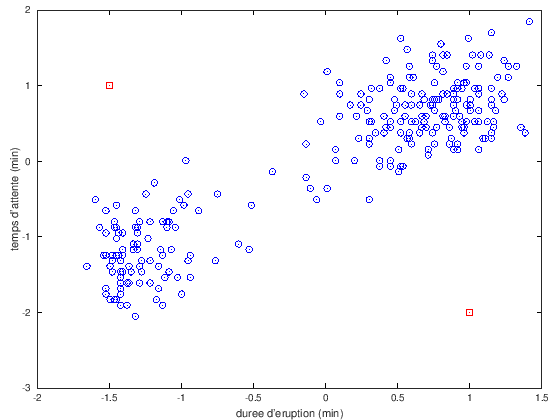

In [2]:
mu_X = mean(X);
sig_X = std(X)

N = size(X,1)

X_norm = (X - repmat(mu_X, N, 1)) ./ repmat(sig_X, N, 1);
plot(X_norm(:,1), X_norm(:,2), "ob")
xlabel("duree d'eruption (min)")
ylabel("temps d'attente (min)")
centers = [-1.5, 1; 1, -2]
hold on
plot(centers(1,:), centers(2,:), "sr")

In [7]:
K = 2;
z = ones(N,1);

for t = 1:20
    distances = zeros(N,K);
    ## Step 1: Compute all the distances of x_i to the centers
    ## and assign the group index z_i for x_i.
    for i = 1:N
        for k = 1:K
            distances(i,k) = norm(X_norm(i,:) - centers(:,k)');
        end    
        [~, j] = min(distances(i,:));
        z(i) = j;
    end
    ## Step 2: Re-calculate the centers
    for k = 1:K
        z_k = (z == k);
        if (sum(z_k) > 0)
            centers(:,k) = mean(X_norm(z_k, :))';
        end
    end    
end



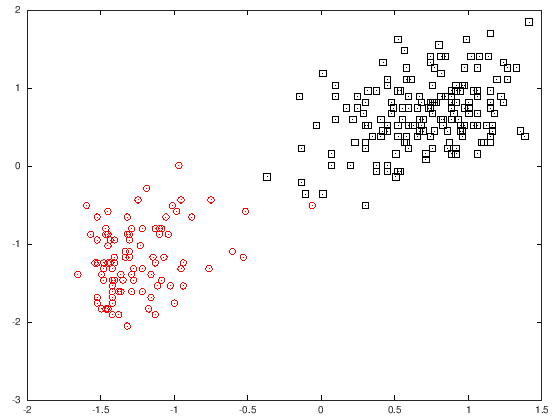

In [8]:
plot(X_norm(z == 1, 1), X_norm(z == 1, 2), 'sk', X_norm(z == 2, 1), X_norm(z == 2, 2), 'or')
